# Load Libraries

In [1]:
# Import packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

# to display graphs in Jupyter notebook
%matplotlib inline       
#from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Load and Explore the Data

In [2]:
data = pd.read_csv("used_cars_data.csv")
data.shape
df = data.copy()

### Check the number of rows and columns

In [3]:
df.shape

(7253, 14)

### Check column names

In [4]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Overview of Data

In [5]:
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## Check column types and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
#check column with null values

df.isnull().sum().sort_values(ascending = False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

### OBSERVATIONS:
* total no of rows is 7253
* total no of columns is 14
* dependent variable is Price
* Mileage, Engine and Power have their units in the entries, need to get rid of the units and make them float
* New_price has 86% values missing, so we will be dropping that column
* Price, Seats, Power, Engine and Mileage also have some missing values
* Power and Engine have the same no of missing values

## CLEAN DATASET 

### NUMERICAL COLUMNS

####  Drop New_price and Sr.No columns



In [8]:
# drop New_price column as more than 60% of data is missing values
# drop S.No & Name columns as they do not affect the Price of the car

df.drop(['New_Price','S.No.'], axis = 1,inplace = True) # drop New_price, S.No & Name columns coz more than 60% of data is missing values

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


###  Clean Mileage, Power and Engine Before EDA
   ####  Mileage, Power and Engine 
   *Remove units, change to float.


In [10]:
# functions to drop the units in the 3 columns


def Mileage_to_num(mileage):
    if isinstance(mileage,str):
        return float(mileage.replace(' kmpl','').replace(' km/kg',''))
    else:
        return np.nan

def Engine_to_num(engine):
    if isinstance(engine,str):
        return float(engine.replace(' CC',''))
    else:
        return np.nan

def Power_to_num(power):
    if isinstance(power,str):
        return (power.replace(' bhp',''))
    else:
        return np.nan



In [11]:
# apply the functions to the 3 columns

df['Mileage'] = df['Mileage'].apply(Mileage_to_num)
df['Engine'] = df['Engine'].apply(Engine_to_num)
df['Power'] = df['Power'].apply(Power_to_num)

#### POWER
* Power column was not able to change dtype to float, found out at least one of the vaules in Power is null, which cannot be converted to float so need to put NaN in place of null and then impute with the median.

In [12]:
# get unique values in Power column
df['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [13]:
# see how many values are null and how many are nan

print(df.Power.value_counts().null)
df['Power'].isnull().sum()

129


46

#### There are 129 values in Power column that have value as null, need to replace with nan
* by converting to numeric, it will change all non numeric values, including null, to NaN. Now can impute NaN with median.

In [14]:
#use to_numeric to convert all values to numeric, hence changing null to nan
# we can see that 'null' values and nan values have been added as nan 129+49 = 175

df['Power'] = pd.to_numeric(df['Power'], errors = 'coerce')

print(df['Power'].isnull().sum())


175


In [15]:
#check Power data type, it has changed to float
df['Power'].dtypes

dtype('float64')

In [16]:
#check dtype of columns
# all 3 are now float

df.dtypes


Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [17]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


### MILEAGE
#### Mileage has some 81 values that are 0, and 2 that are NaN

In [18]:
df.isnull().sum().sort_values(ascending = False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [19]:
df.groupby('Mileage').size()

Mileage
0.00     81
6.40      1
7.50      1
7.81      1
7.94      3
         ..
30.46     2
31.79     2
32.26     5
33.44     4
33.54     5
Length: 438, dtype: int64

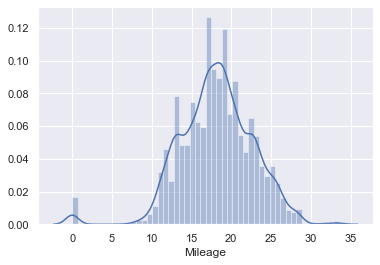

In [20]:
sns.distplot(df.Mileage)

#### 0 is clearly an outlier of the Mileage distribution. Mean and median are almost the same, going to replace 0 in Mileage with median


###  Treat columns with missing values


In [21]:
df.isnull().sum().sort_values(ascending = False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

#### ENGINE

In [22]:
# check unique values of Engine
df['Engine'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

#### There are no 0 values, replace nan with median

In [23]:
# fill nan with Engine column median

df['Engine'].fillna(df['Engine'].median(), inplace = True)

In [24]:
# check missing values in Engine

df['Engine'].isnull().sum()

0

#### No more missing values in Engine

In [25]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                 175
Seats                  53
Price                1234
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB



#### Price,Seats, Mileage and Power have missing values. Check their distributions for some clarity

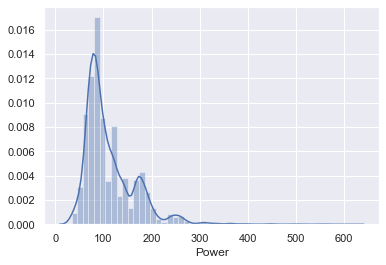

In [27]:
#plot dist of Power

sns.distplot(df.Power)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


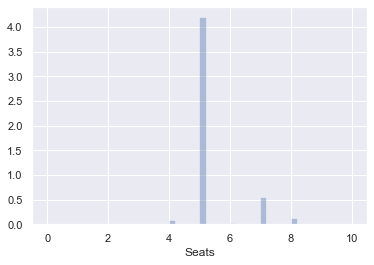

In [28]:
#plot dist of Seats

sns.distplot(df.Seats)

In [29]:
#check values that are 0 in Seats

df.groupby('Seats').size()

Seats
0.0        1
2.0       18
4.0      119
5.0     6047
6.0       38
7.0      796
8.0      170
9.0        3
10.0       8
dtype: int64

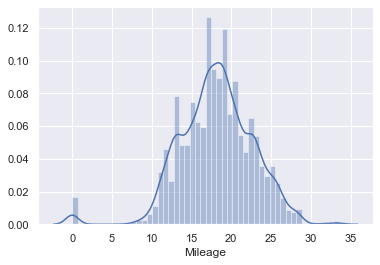

In [30]:
#plot dist of Mileage

sns.distplot(df.Mileage)

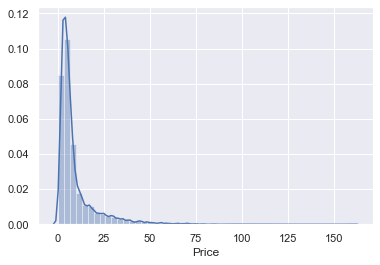

In [31]:
#plot dist of Price

sns.distplot(df.Price)

In [32]:
df.groupby('Price').size()

Price
0.44      1
0.45      3
0.50      2
0.51      1
0.53      2
         ..
93.67     1
97.07     1
100.00    1
120.00    1
160.00    1
Length: 1373, dtype: int64

####   OBSERVATIONS:
* Price has about 17% values missing, it is the dependent variable and moderator on forum said to not impute the missing values and drop those observations
* Seats has 53 missing values, and 1 value that is 0, replace both with mode, as majority of cars have 5 seats
* Mileage has 2 missing values, and 81 values that are 0, replace both with median
* Power has 175 missing values, replace with median


#### Drop rows in Price column that have missing values since it is the dependent variable

In [33]:

df.dropna(subset=['Price'], inplace=True)


In [34]:
df.shape

(6019, 12)

In [35]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                143
Seats                 42
Price                  0
dtype: int64

#### MILEAGE
* fill 0 values with nan
* fill nan values with mode

In [36]:
# check how many values are 0
df.groupby('Mileage').size()

Mileage
0.00     68
6.40      1
7.50      1
7.81      1
7.94      2
         ..
30.46     1
31.79     2
32.26     2
33.44     4
33.54     5
Length: 430, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [38]:
# fill 0 with nan


df.loc[(df.Mileage == 0), 'Mileage'] = np.nan


In [39]:
# now check how many 0 again
# no more 0 values
df.groupby('Mileage').size()

Mileage
6.40     1
7.50     1
7.81     1
7.94     2
8.00     1
        ..
30.46    1
31.79    2
32.26    2
33.44    4
33.54    5
Length: 429, dtype: int64

In [40]:
# check the null values in Mileage, should have increased to 68+2=70

df.Mileage.isnull().sum()

70

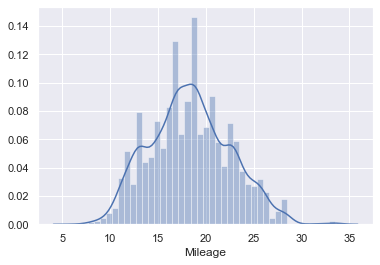

In [41]:
# plot the dist of Mileage after moving 0 values to nan

sns.distplot(df.Mileage)

#### No more 0 values, and normal distribution, impute nan with median


In [42]:
# now fill nan with median

df['Mileage'].fillna(df['Mileage'].median(), inplace = True)

In [43]:
# check the null values in Mileage, should be 0

df.Mileage.isnull().sum()

0

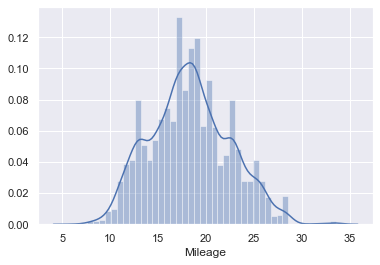

In [44]:
# plot Mileage dist after filling missing values with median
sns.distplot(df.Mileage)

#### SEATS
* fill 0 values with nan
* fill nan values with mode

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [46]:
# check how many null and 0 values in Seats

print(df['Seats'].isnull().sum())
df.groupby('Seats').size()

42


Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
dtype: int64

In [47]:
# fill 0 with nan

df.loc[(df['Seats']==0),'Seats'] = np.nan

In [48]:
# check that there are no more 0 values and null values have increased to 53+1=54

print(df['Seats'].isnull().sum())
df.groupby('Seats').size()

43


Seats
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
dtype: int64

In [49]:
# now fill null values in Seats with mode of 5

print(df['Seats'].mode())
df['Seats'].fillna(df['Seats'].mode()[0], inplace = True)

df.info()

0    5.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [50]:
# check the null values are now 0

print(df['Seats'].isnull().sum())
df.groupby('Seats').size()

0


Seats
2.0       16
4.0       99
5.0     5057
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


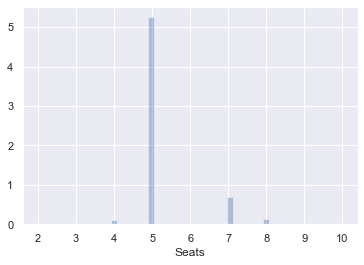

In [51]:
# check dist of Seats
# can see that there are a few more values with 5 seats

sns.distplot(df.Seats)

#### SEATS SHOULD BE CATEGORICAL VARIABLE, WILL CHANGE LATER

#### POWER
* replace nan with median

In [52]:
# check how many null and 0 values in Power
# NO 0 Values

print(df['Power'].isnull().sum())
df.groupby('Power').size()

143


Power
34.20      7
35.00     17
35.50      1
37.00     12
37.48     12
          ..
500.00     1
503.00     1
550.00     1
552.00     1
560.00     1
Length: 369, dtype: int64

In [53]:
# fill nan with median

df['Power'].fillna(df['Power'].median(), inplace = True)

In [54]:
#check how many null values in Power now
# no. more null values

df['Power'].isnull().sum()

0

In [55]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

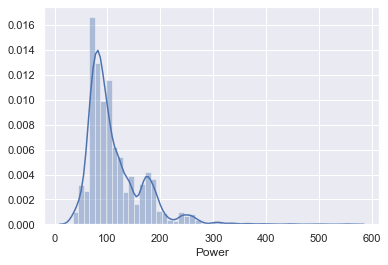

In [56]:
# plot distribution of power

sns.distplot(df.Power)

## EDA numerical data

### Univariate Analysis - Numerical

In [57]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to. display numbers in digits

In [58]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,ax = ax_hist)      # plot histogram of data
    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

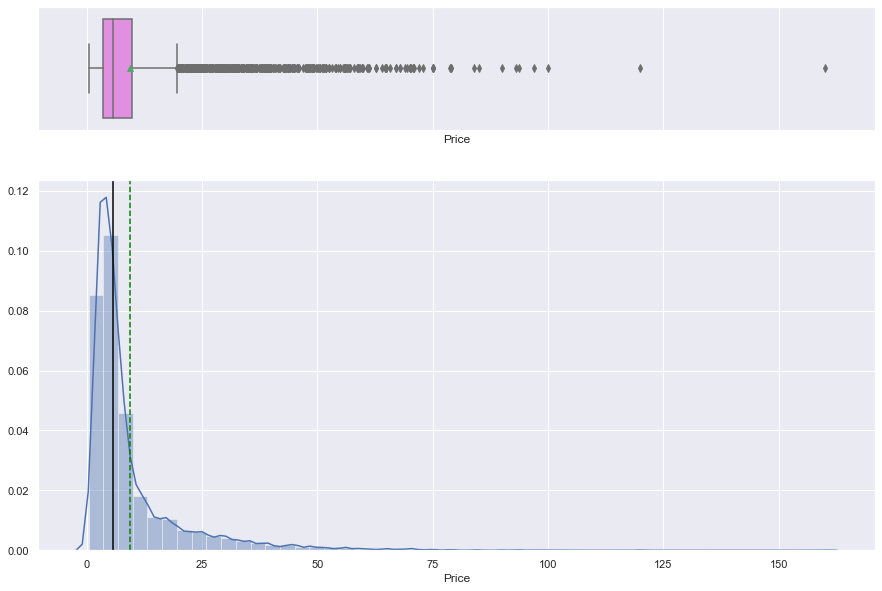

In [59]:
#see distribution for Price

histo_box(df['Price'])



####   OBSERVATIONS:
* Price has a lot of outliers on the upper side, making it right skewed
* some cars are much more pricey than other cars

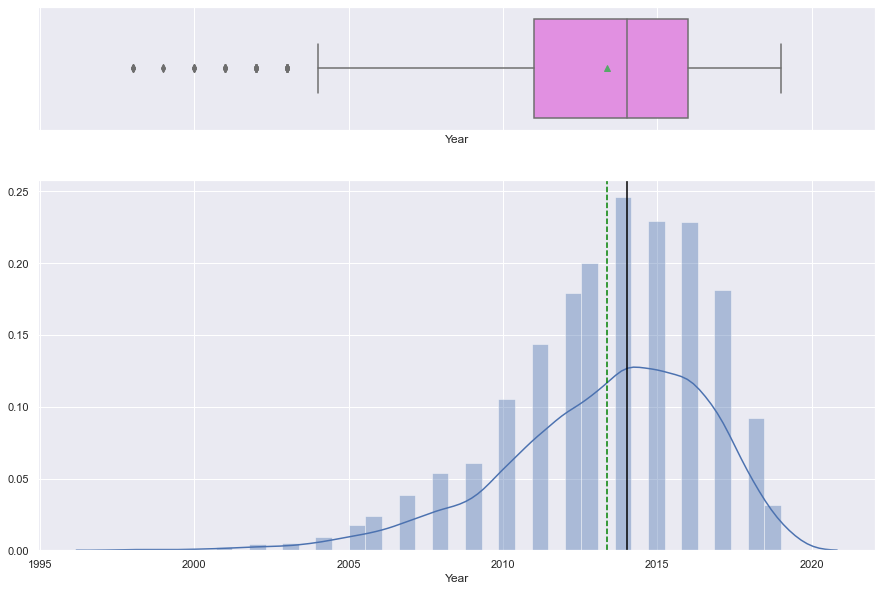

In [60]:
#see distribution for Year

histo_box(df['Year'])



####   OBSERVATIONS:
* Year has some outliers on the lower side, making it left skewed
* some cars are too old

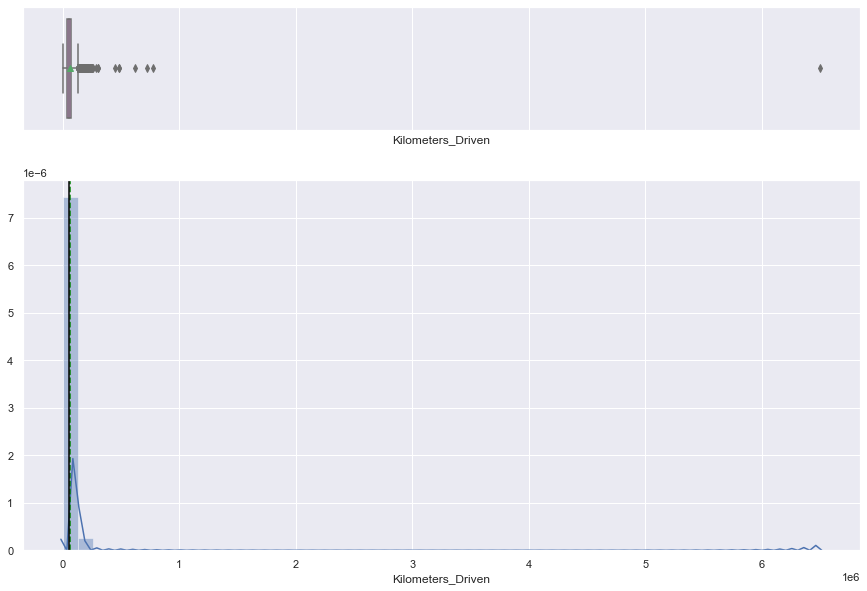

In [61]:
#see distribution for Kilometers_Driven

histo_box(df['Kilometers_Driven'])



####   OBSERVATIONS:
* Kilometers_Driven has one outlier that is very far from other outliers, making it very heavily skewed to the right
* Kilometers_Driven could have some correlation with the age of cars, so the right outliers of Km driven corresponds with the left outliers of Year



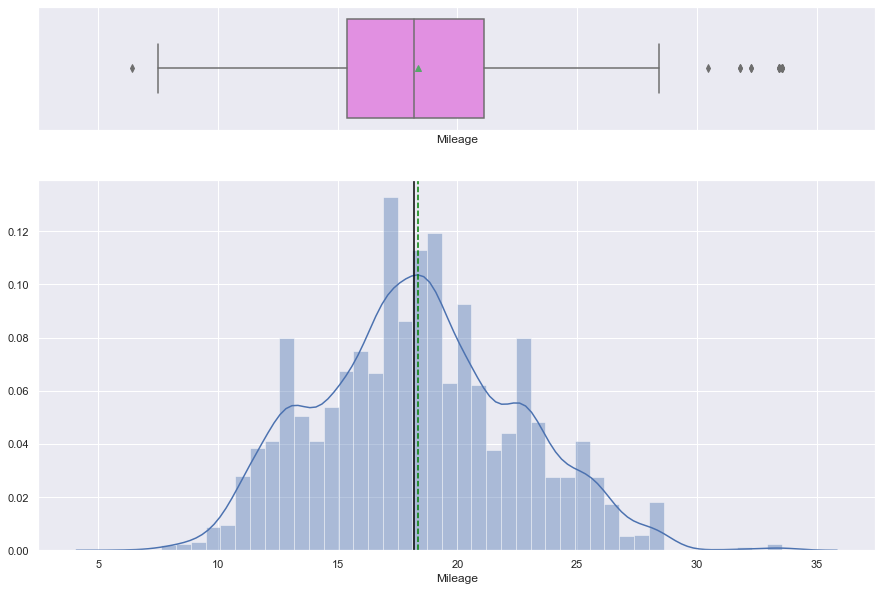

In [62]:
#see distribution for Mileage

histo_box(df['Mileage'])


####   OBSERVATIONS:
* Mileage has a few outlier values on both sides, distribution is mostly normal




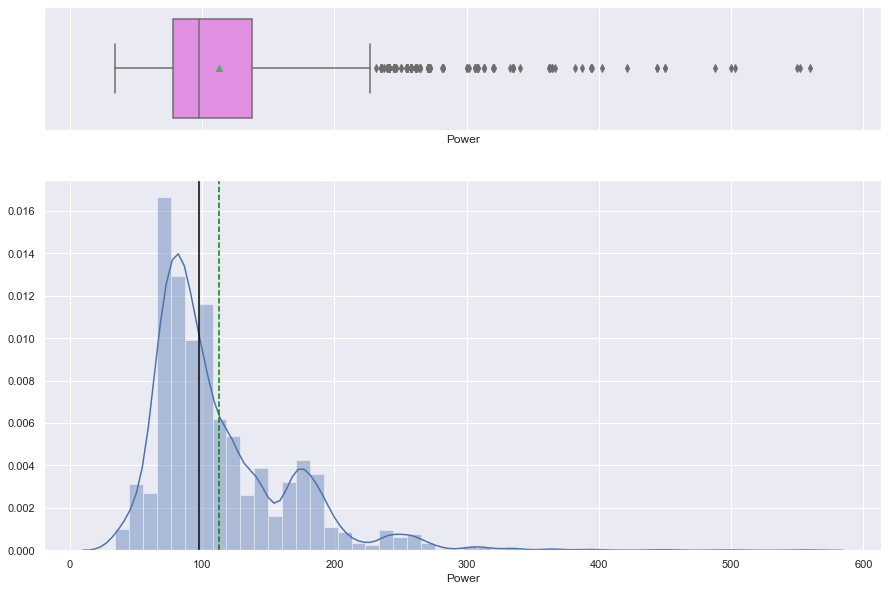

In [63]:
#see distribution for Mileage

histo_box(df['Power'])


#### OBSERVATIONS:
* Power has quite a few outlier values on the right side, making it right skewed.
* some cars just have a lot more power than other cars


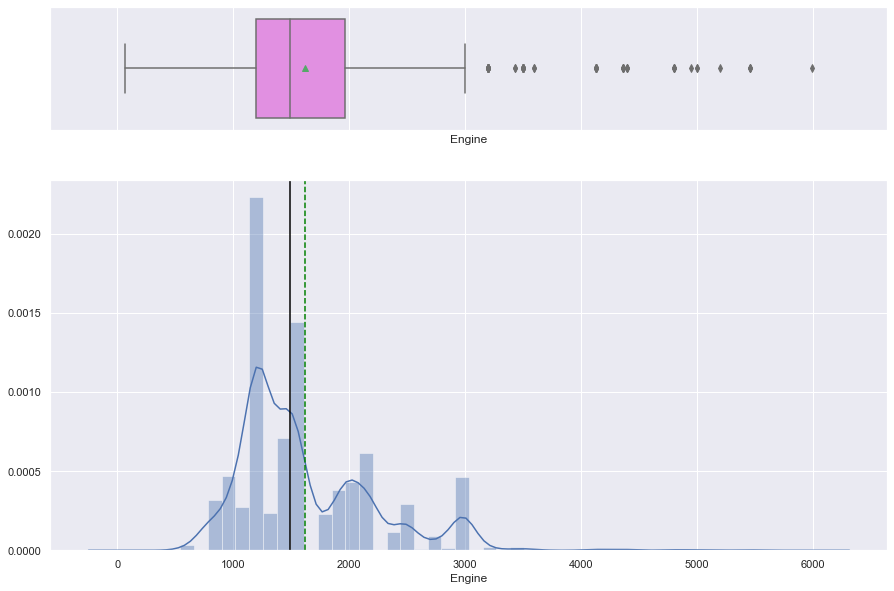

In [64]:
#see distribution for Mileage

histo_box(df['Engine'])


####   OBSERVATIONS:
* Engine has some outliers on the right side as well
* Some cars have bigger engines than others
* Engine, Power and Mileage might have some correlation with eachother, will check for that




/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


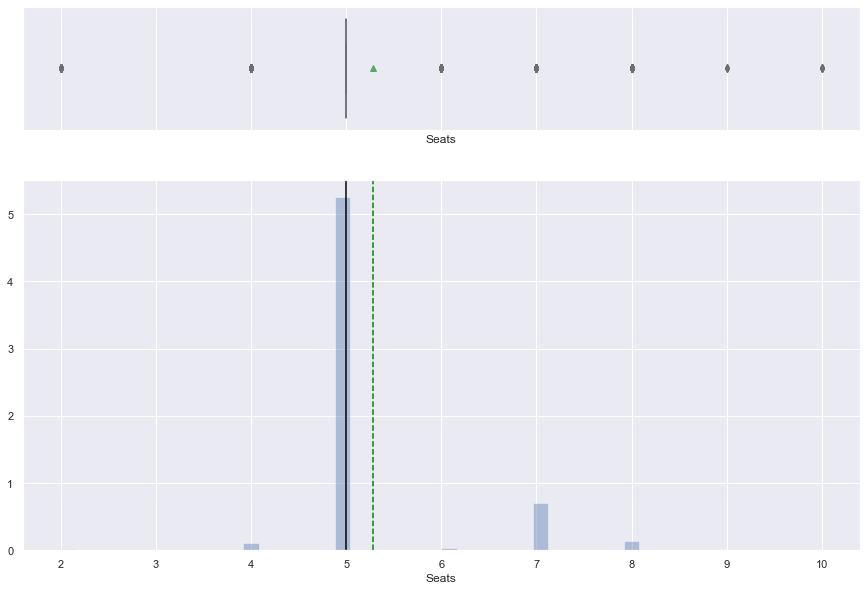

In [65]:
#see distribution for Mileage

histo_box(df['Seats'])


####   OBSERVATIONS:
* Seats should be a categorical variable, will change its dtype to categorical




#### ADD Seats to categorical dtype

In [66]:
# change Seats dtype to category

df['Seats'] = df['Seats'].astype('category')
df.Seats.dtype

CategoricalDtype(categories=[2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], ordered=False)

## EDA categorical data

### Univariate Analysis - Categorical

In [67]:
#function to plot the percentages on the barplots.


def percentage_barplot(ax, feature):
    
   
    total = len(feature)  #length of column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # calculate percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 12)
    plt.show() #show the plot


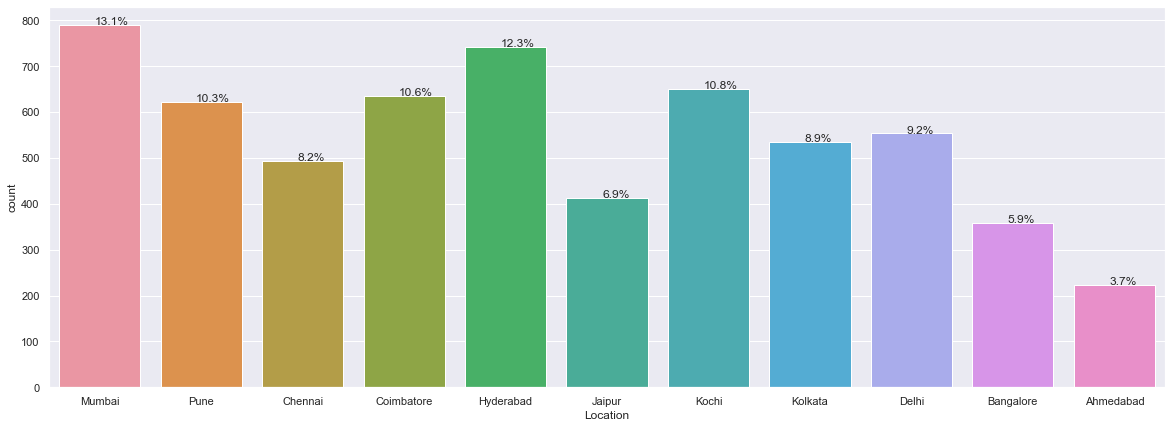

In [68]:

#Location

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Location'])
percentage_barplot(ax,df['Location'])





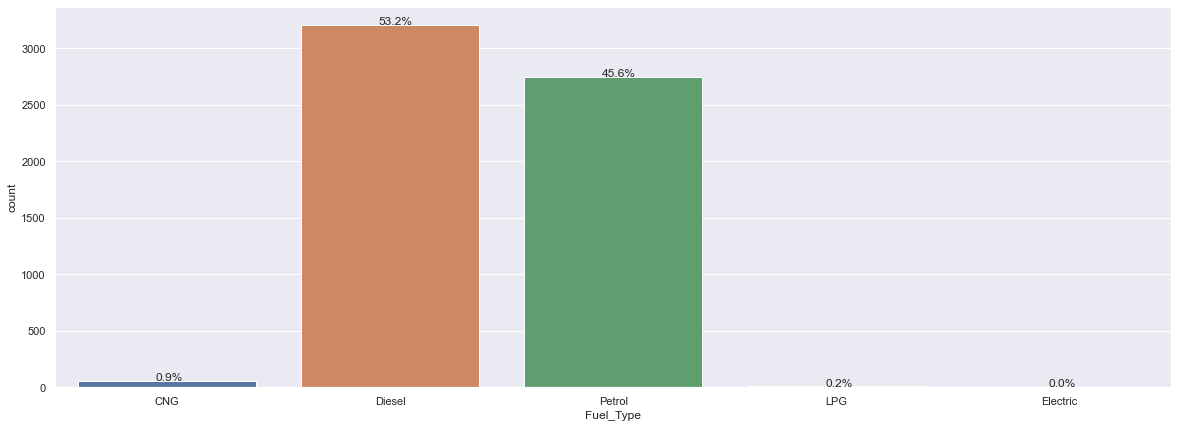

In [69]:

#Fuel_Type

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Fuel_Type'])
percentage_barplot(ax,df['Fuel_Type'])





####   OBSERVATIONS:
* 98.9% of the cars use Diesel or Petrol 




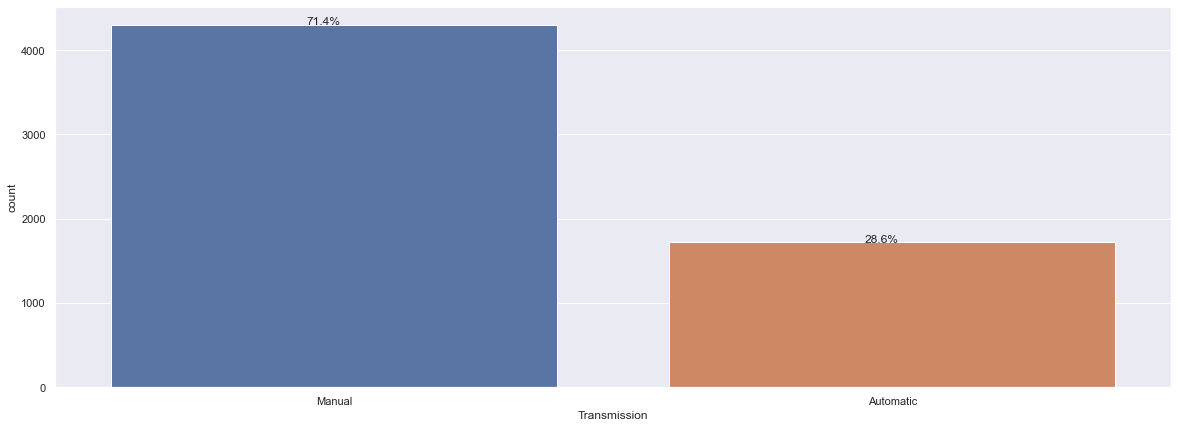

In [70]:

#Transmission

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Transmission'])
percentage_barplot(ax,df['Transmission'])





####   OBSERVATIONS:
* more cars have Manual transmission over Automatic




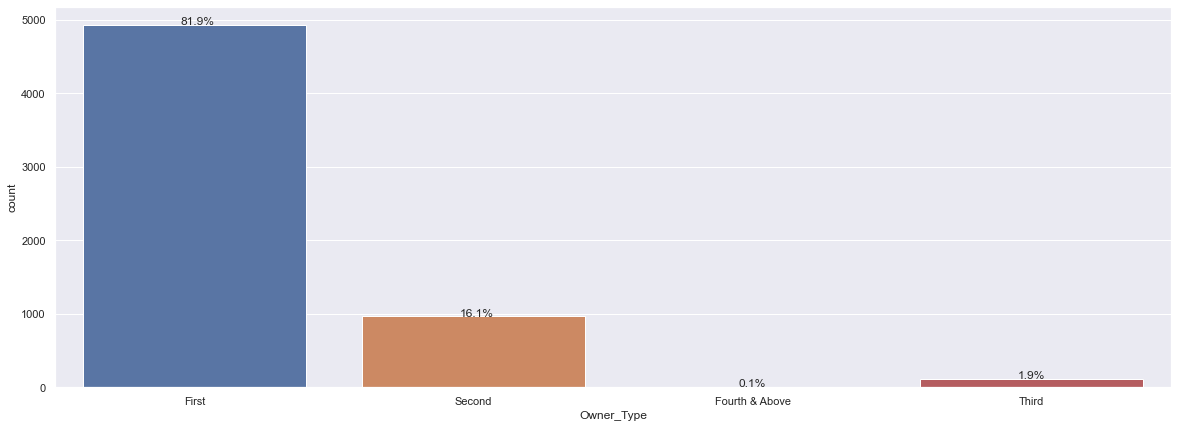

In [71]:

#Owner_Type

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Owner_Type'])
percentage_barplot(ax,df['Owner_Type'])





####   OBSERVATIONS:
* Most of the cars are being sold by thier first owners.
* Barely any cars (about2%) are sold by third and later owners






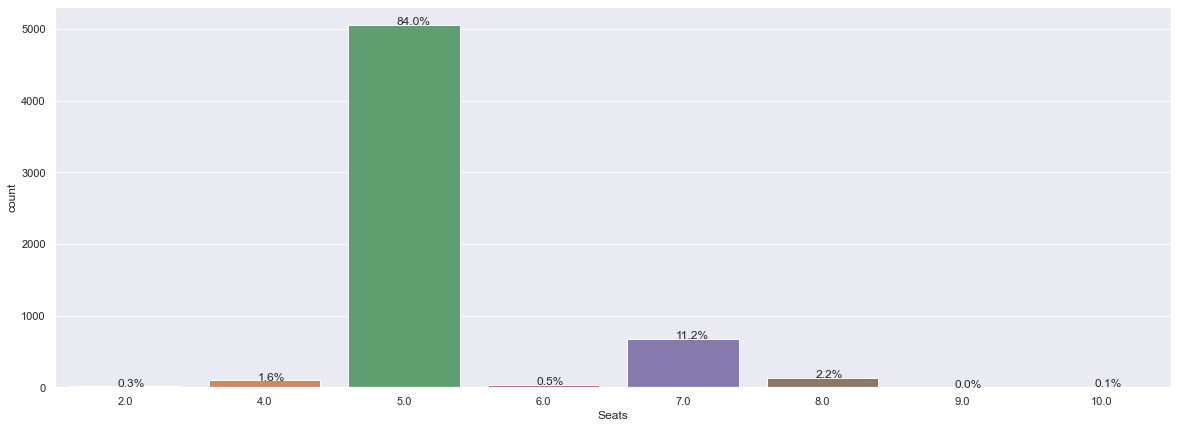

In [72]:

#Seats

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Seats'])
percentage_barplot(ax,df['Seats'])





####   OBSERVATIONS:
* Most cars have 5 seats
* Less than 1% of cars have seats less than 4 or more than 8







## EDA BiVariate analysis

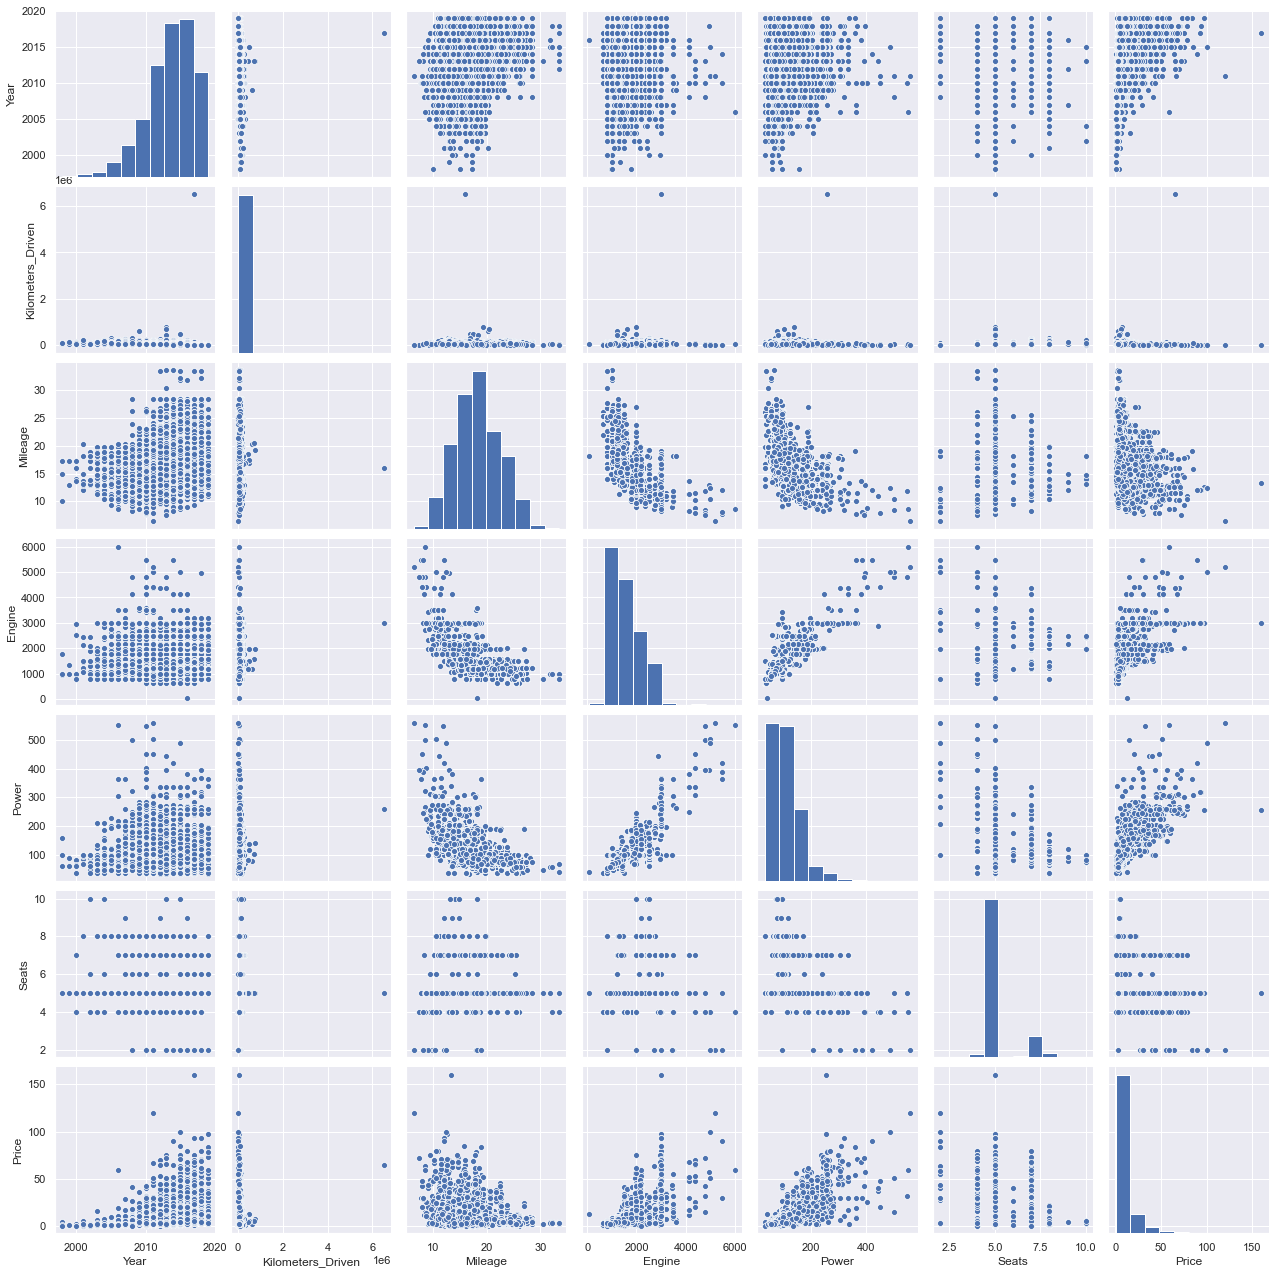

In [73]:

sns.pairplot(data=df)
plt.show()


####   OBSERVATIONS:
* Engine and Power have a linear correlation to eachother
* Power, Engine seem to have a positive correlation with Price
* Mileage seems to have a negative correlation to Price
* Kilometers_Driven does not seem to affect the Price too much
* older cars have lower Price









### CORREALTION MATRIX OF NUMERICAL VARIABLES

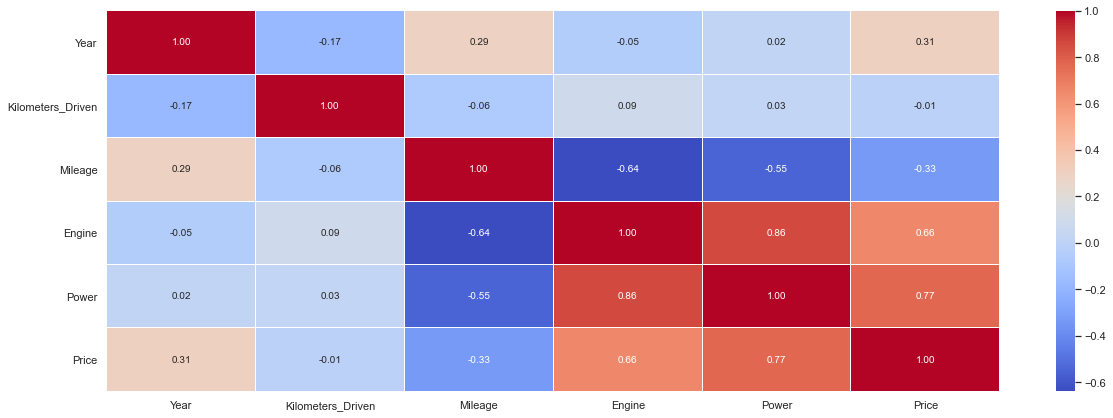

In [74]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


In [75]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
Year,1.000000,-0.173048,0.291066,-0.050086,0.024195,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.064248,0.090890,0.032080,-0.011493
Mileage,0.291066,-0.064248,1.000000,-0.639343,-0.546433,-0.329958
Engine,-0.050086,0.090890,-0.639343,1.000000,0.860410,0.657347
Power,0.024195,0.032080,-0.546433,0.860410,1.000000,0.769711
Price,0.305327,-0.011493,-0.329958,0.657347,0.769711,1.000000


####   OBSERVATIONS:
* PRICE has high positive correlation with Power and Engine
* Price has a positive correlation with Year, that is newer cars have higher Price
* Price and Mileage have a negative correlation, newer cars that give better mileage are more pricey
* Engine and Power have a high positive correlation, like we suspected
* Year and mileage have a positive correlation, newer cars give better mileage








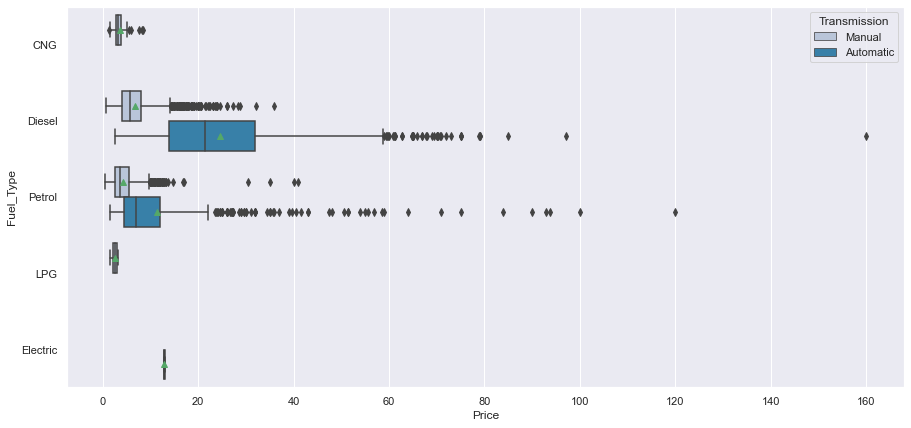

In [76]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Price"],df["Fuel_Type"],hue = df["Transmission"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Most automatic transmission cars have fuel type Diesel or Petrol.
* Automatic transmission cars cost more than manual






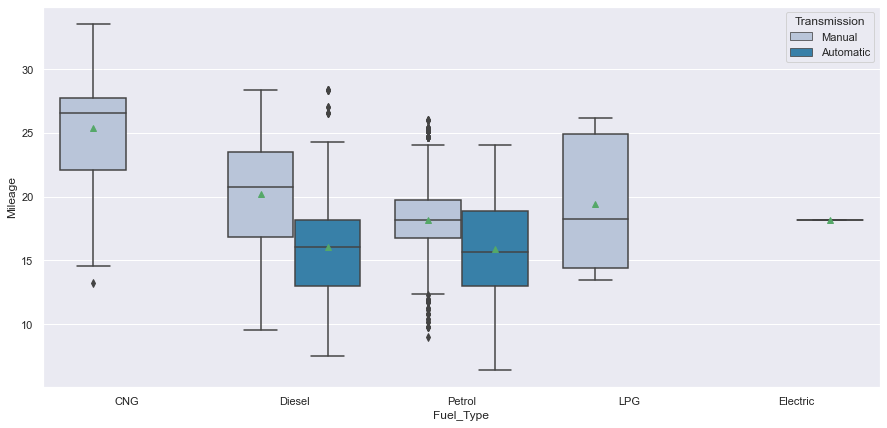

In [77]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Fuel_Type"],df["Mileage"],hue = df["Transmission"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Manual CNG cars give the best mileage
* Manual cars tend to give better mileage than automatic cars
* 

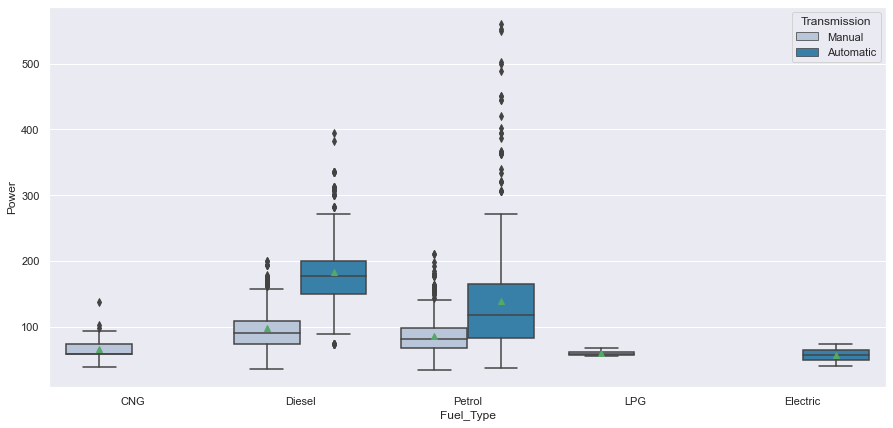

In [78]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Fuel_Type"],df["Power"],hue = df["Transmission"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Higher Power cars have mostly Diesel or Petrol fuel engines

### Price vs Engine vs Transmission

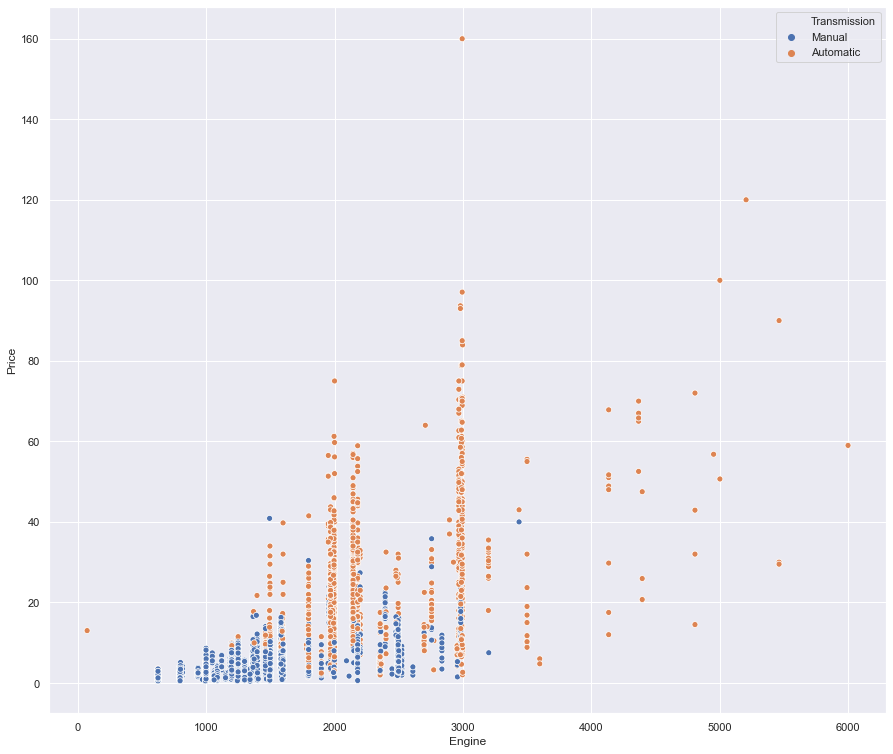

In [79]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Engine', hue='Transmission', data=df);

####   OBSERVATIONS:
* Cars with AUtomatic Transmission have a higher Price
* Cars with bigger Engines tend to have Automatic Transmission






### Price vs Power vs Transmission

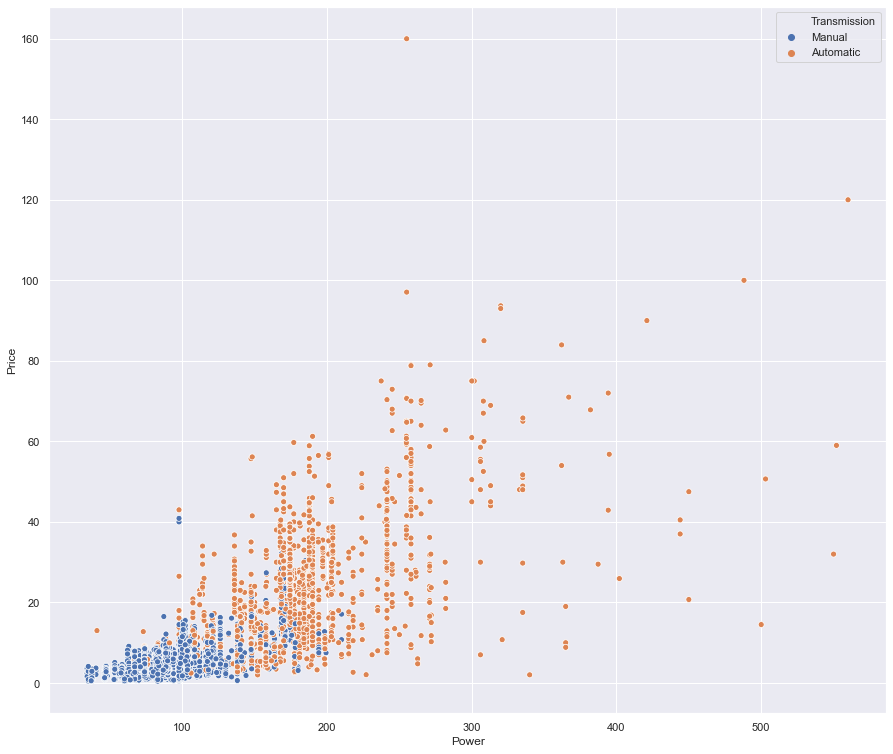

In [80]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Power', hue='Transmission', data=df);

####   OBSERVATIONS:
* All cars more than about 225 bhp have Automatic transmission
* higher POwer cars cost more





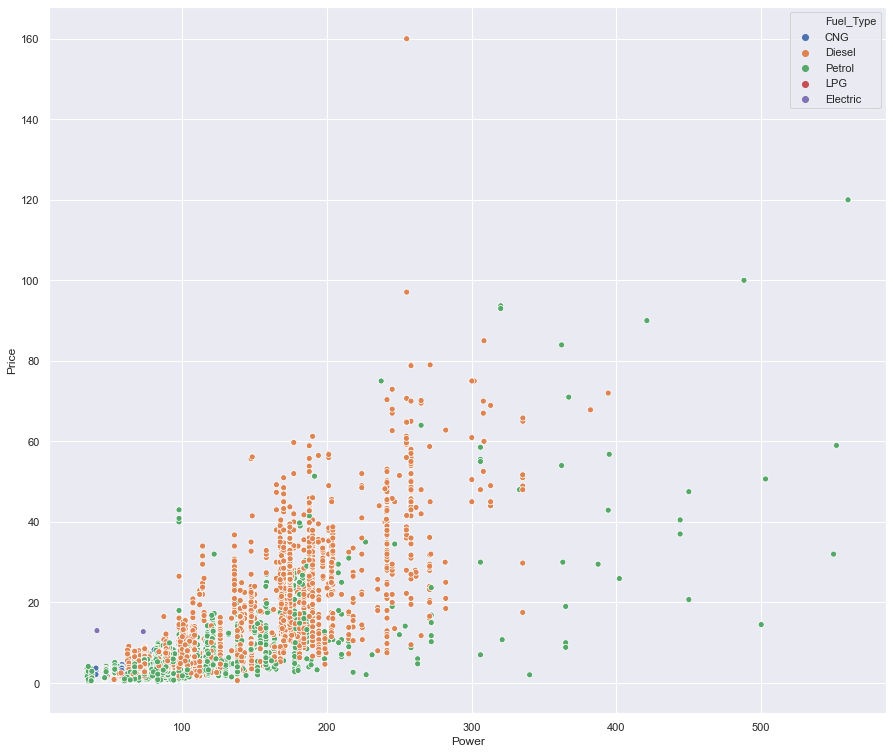

In [81]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Power', hue='Fuel_Type', data=df);

####   OBSERVATIONS:
* More powerful cars use Petrol, followed by Diesel




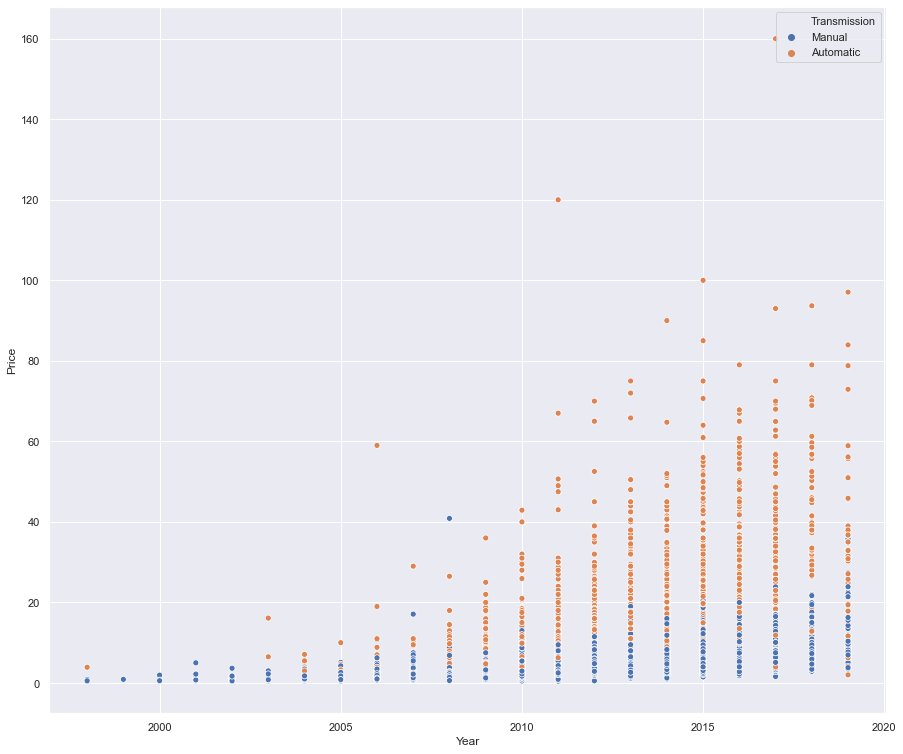

In [82]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', hue='Transmission', data=df);

####   OBSERVATIONS:
* There were almost no Automatic transmission cars before 2004




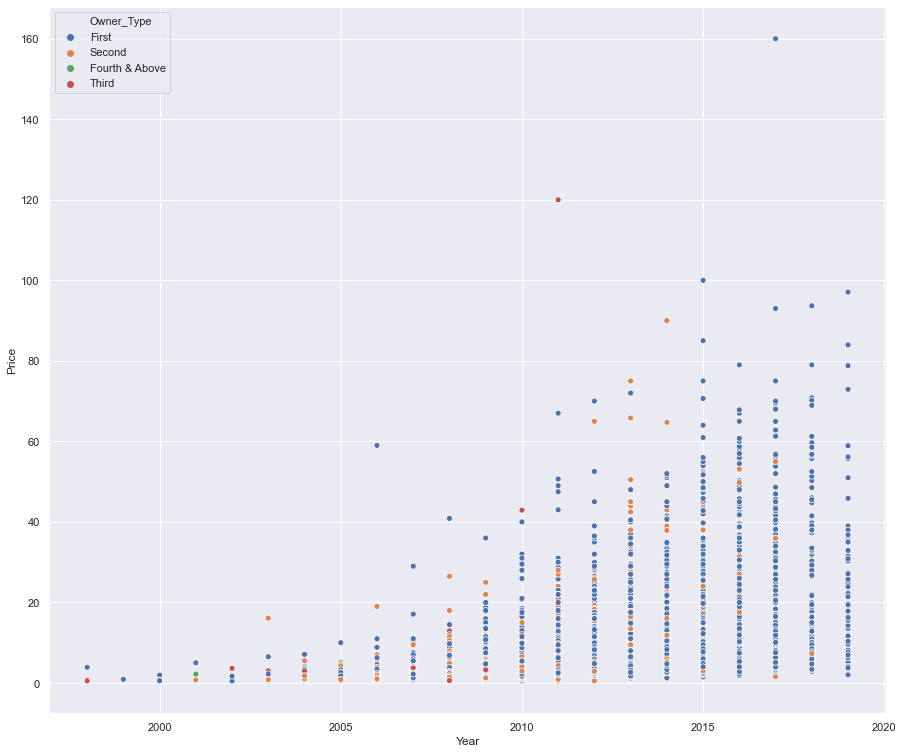

In [83]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', hue='Owner_Type', data=df);

####   OBSERVATIONS:
* Cars from later years have mostly had only 1 previous owner




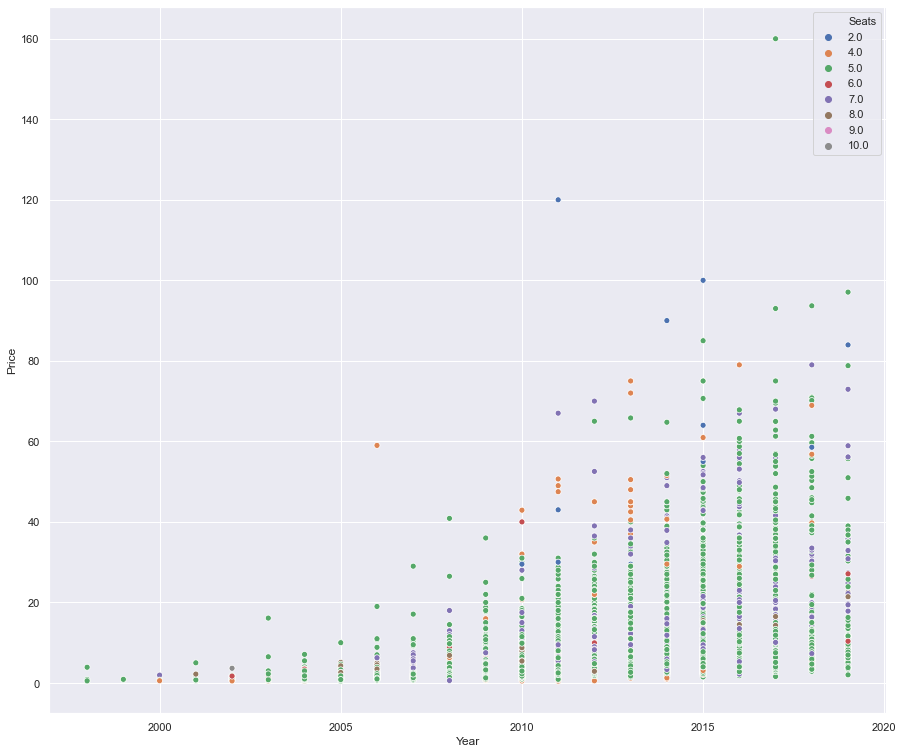

In [84]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', hue='Seats', data=df);

In [85]:
#df1['Year_log'] = np.log(df1['Year'])
#age of car

#def from_year_to_age(year):
    
#    return (2020 - year) 

#df1['Age_of_car'] = df['Year'].apply(lambda x: from_year_to_age(x))

#df1.head()
#df1.head()

In [86]:
#plt.figure(figsize=(15,13))
#sns.scatterplot(y='Price', x='Age_of_car', data=df1);

#### PLOT BOXPLOTS OF ALL NUMERIC VARIABLES IN ONE PLOT TO SEE OUTLIERS PRESENT

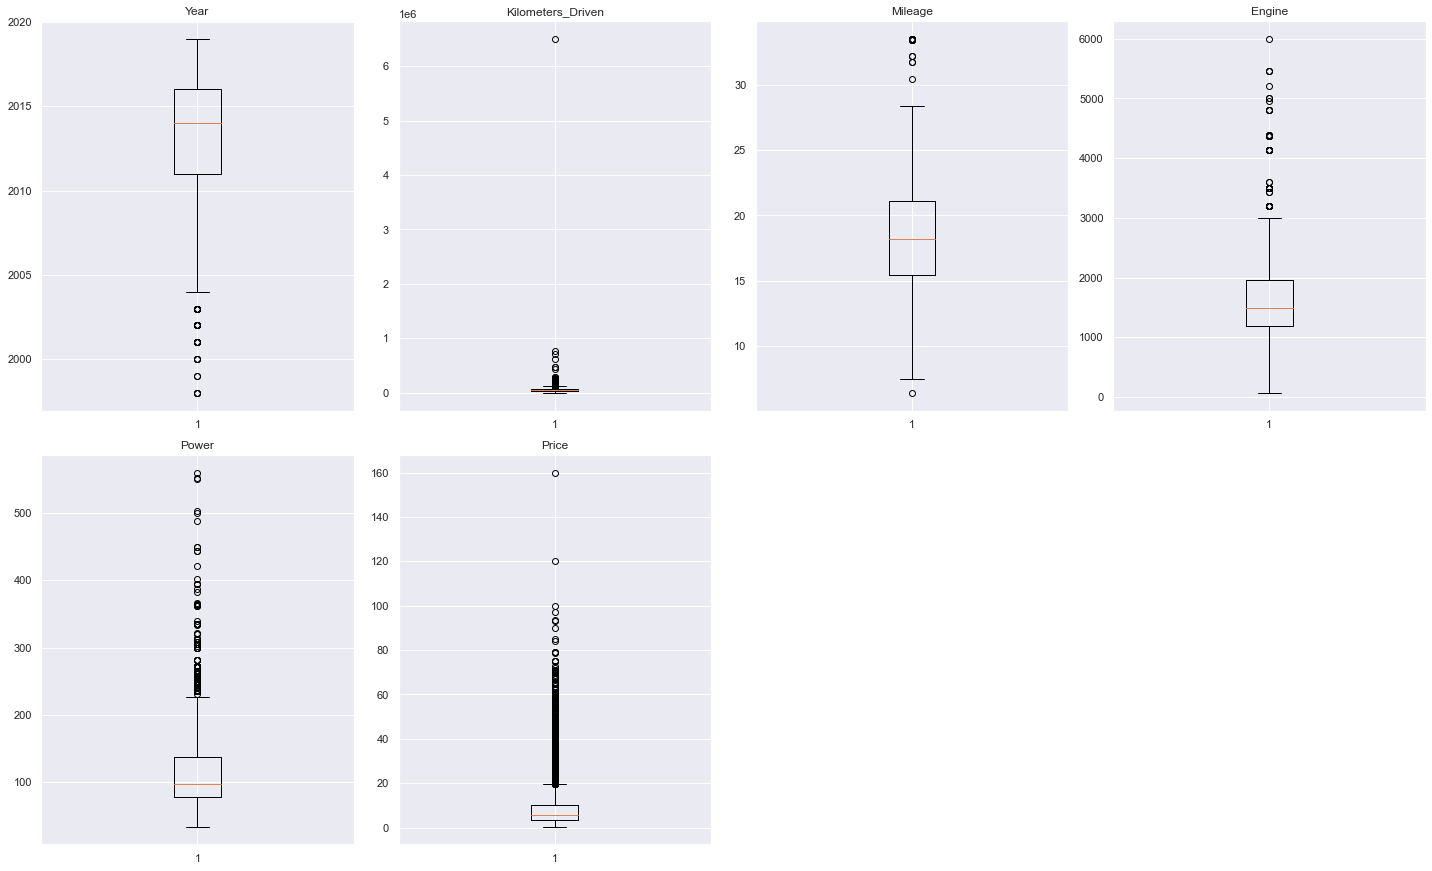

In [87]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist() #all numeric columns

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

####   OBSERVATIONS:
* Price, Kilometers_Driven and Power have a lot of outlier vlaues


##   FIX CATEGORICAL DATATYPE


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   object  
 5   Transmission       6019 non-null   object  
 6   Owner_Type         6019 non-null   object  
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   category
 11  Price              6019 non-null   float64 
dtypes: category(1), float64(4), int64(2), object(5)
memory usage: 730.5+ KB


In [89]:
# Converting object type column to category type
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')


## TREAT OUTLIERS

In [90]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):

    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    lower_whisker = Q1 - 1.5*IQR 
    upper_whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker) # all the values samller than Lower_Whisker will be given value of Lower_whisker 
                                                            # and all the values above upper_whishker will be given value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
   
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [91]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

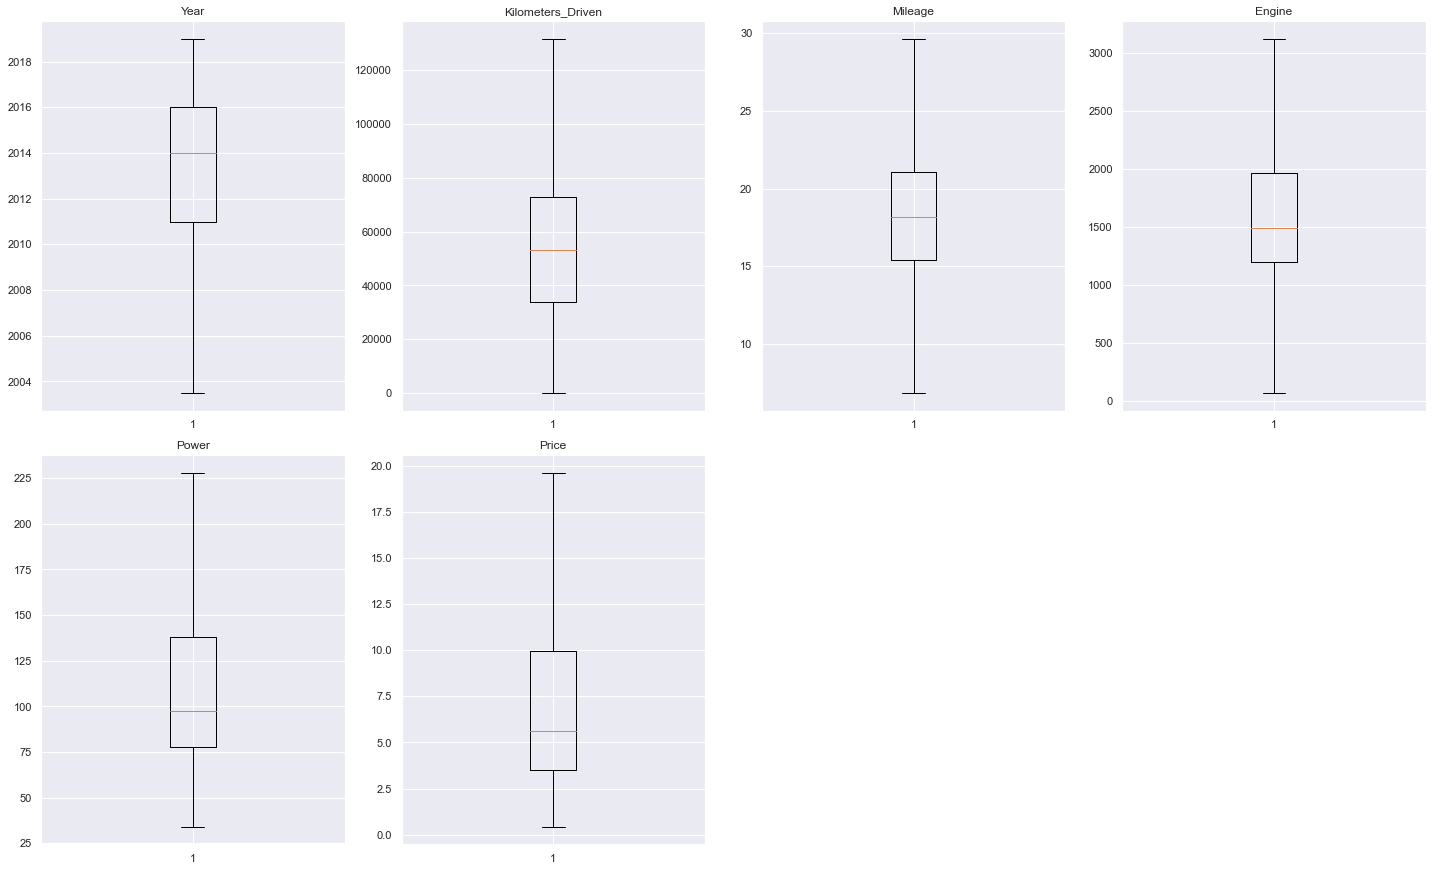

In [92]:
# see all boxplots to see if outliers are still present
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### MODEL BUILDING

In [93]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010.000000,72000,CNG,Manual,First,26.600000,998.000000,58.160000,5.000000,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.000000,41000,Diesel,Manual,First,19.670000,1582.000000,126.200000,5.000000,12.500000
2,Honda Jazz V,Chennai,2011.000000,46000,Petrol,Manual,First,18.200000,1199.000000,88.700000,5.000000,4.500000
3,Maruti Ertiga VDI,Chennai,2012.000000,87000,Diesel,Manual,First,20.770000,1248.000000,88.760000,7.000000,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.000000,40670,Diesel,Automatic,Second,15.200000,1968.000000,140.800000,5.000000,17.740000


In [94]:
#look at all the categorical variables

df.describe(exclude = [np.number])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats
count,6019,6019,6019,6019,6019,6019.000000
unique,1876,11,5,2,4,8.000000
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,5.000000
freq,49,790,3205,4299,4929,5057.000000


#### DROP Name 

In [95]:
# drop Name

df = df.drop(['Name'], axis = 1)

In [96]:
#Check that Name is dropped 

df.describe(exclude = [np.number])

,Location,Fuel_Type,Transmission,Owner_Type,Seats
count,6019,6019,6019,6019,6019.000000
unique,11,5,2,4,8.000000
top,Mumbai,Diesel,Manual,First,5.000000
freq,790,3205,4299,4929,5057.000000


#### Look at unique values of the categorical variables

In [97]:
# check unique values of all categorical data, will see any nan also if such values exist in some column

print(df['Location'].unique())
print(df['Fuel_Type'].unique()) 
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())
print(df['Seats'].unique())

[Mumbai, Pune, Chennai, Coimbatore, Hyderabad, ..., Kochi, Kolkata, Delhi, Bangalore, Ahmedabad]
Length: 11
Categories (11, object): [Mumbai, Pune, Chennai, Coimbatore, ..., Kolkata, Delhi, Bangalore, Ahmedabad]
[CNG, Diesel, Petrol, LPG, Electric]
Categories (5, object): [CNG, Diesel, Petrol, LPG, Electric]
[Manual, Automatic]
Categories (2, object): [Manual, Automatic]
[First, Second, Fourth & Above, Third]
Categories (4, object): [First, Second, Fourth & Above, Third]
[5.000000, 7.000000, 8.000000, 4.000000, 6.000000, 2.000000, 10.000000, 9.000000]
Categories (8, float64): [5.000000, 7.000000, 8.000000, 4.000000, 6.000000, 2.000000, 10.000000, 9.000000]


### Define X and y variables

In [98]:
#Define X and y variables
X = df.drop(['Price'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

     Location        Year  Kilometers_Driven Fuel_Type Transmission  \
0      Mumbai 2010.000000              72000       CNG       Manual   
1        Pune 2015.000000              41000    Diesel       Manual   
2     Chennai 2011.000000              46000    Petrol       Manual   
3     Chennai 2012.000000              87000    Diesel       Manual   
4  Coimbatore 2013.000000              40670    Diesel    Automatic   

  Owner_Type   Mileage      Engine      Power    Seats  
0      First 26.600000  998.000000  58.160000 5.000000  
1      First 19.670000 1582.000000 126.200000 5.000000  
2      First 18.200000 1199.000000  88.700000 5.000000  
3      First 20.770000 1248.000000  88.760000 7.000000  
4     Second 15.200000 1968.000000 140.800000 5.000000  
      Price
0  1.750000
1 12.500000
2  4.500000
3  6.000000
4 17.740000


In [99]:
#check shape of X and y
print(X.shape)
print(y.shape)

(6019, 10)
(6019, 1)


### CREATE DUMMY VARIABLES 


In [100]:
#Create dummy variables for the categorical variables Location,Fuel_Type, Transmission, Owner_Type, Seats
X = pd.get_dummies(X, columns=['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Seats'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010.000000,72000,26.600000,998.000000,58.160000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2015.000000,41000,19.670000,1582.000000,126.200000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011.000000,46000,18.200000,1199.000000,88.700000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2012.000000,87000,20.770000,1248.000000,88.760000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2013.000000,40670,15.200000,1968.000000,140.800000,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


#### Split the data into train and test

In [101]:
# split data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# take a look ar X_train

print(X_train.shape)
print(X_test.shape)
X_train.head()


(4213, 30)
(1806, 30)


,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
4201,2011.000000,77000,22.070000,1199.000000,73.900000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4383,2016.000000,19947,20.360000,1197.000000,78.900000,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1779,2014.000000,70963,15.100000,2179.000000,140.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4020,2013.000000,115195,25.200000,1248.000000,74.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3248,2011.000000,58752,16.470000,1198.000000,73.900000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Choose Model, Train and Evaluate

### MODEL 1

In [103]:
#Fit Linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
#print("\nCoefficients of the equation are:", linearregression.coef_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)  


Intercept of the linear equation: [-1038.54194449]
The coefficient for Year is 0.5193023538759854
The coefficient for Kilometers_Driven is -1.948087070008108e-05
The coefficient for Mileage is -0.1226702484108558
The coefficient for Engine is 0.0008509955277064601
The coefficient for Power is 0.06150892058967121
The coefficient for Location_Bangalore is 0.6835113110747975
The coefficient for Location_Chennai is -0.0364666714640191
The coefficient for Location_Coimbatore is 0.5058266274619887
The coefficient for Location_Delhi is -0.5838458030963057
The coefficient for Location_Hyderabad is 0.5972737589876683
The coefficient for Location_Jaipur is 0.0002892002386555631
The coefficient for Location_Kochi is -0.20068479098554767
The coefficient for Location_Kolkata is -1.4694098108681628
The coefficient for Location_Mumbai is -0.5252938010678129
The coefficient for Location_Pune is -0.1469901120017995
The coefficient for Fuel_Type_Diesel is 0.6997853269923068
The coefficient for Fuel_Type

## Evaluate model performance

In [104]:
# MAE on test data
mean_absolute_error(y_test, pred)

1.7229524951403874

In [105]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.3428794380094686

In [106]:
# R2 Squared on test data
r2_score(y_test, pred)

0.8381767881108586

#### Model 1 accuracy
* R^2 is 83.8% lets see if this can be further improved

### Linear regression model using statsmodel

In [107]:
# build linear regression model using statsmodel 
import statsmodels.api as sm

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     737.3
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9470.8
No. Observations:                4213   AIC:                         1.900e+04
Df Residuals:                    4182   BIC:                         1.920e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 1 Insights
* R^2 is 84.1% lets see if this can be further improved
* Adjusted R^2 is 0.84, very close to R^2
* Need to check for Linear Regression Assumptions:

    1. No Multicollinearity - VIF SCORE LESS THAN 5
    2. Mean of residual = 0
    3. No Heteroscedacity
    4. Linearity of Variables
    5. Normality of error terms


### Assumption 1:  Check for Multicollinearity - VIF Scores < 5

In [108]:
# get VIF scores

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       831415.870684
Year                             2.123890
Kilometers_Driven                1.907091
Mileage                          3.508971
Engine                           8.128237
Power                            6.188252
Location_Bangalore               2.474016
Location_Chennai                 2.993240
Location_Coimbatore              3.522268
Location_Delhi                   3.166724
Location_Hyderabad               3.828322
Location_Jaipur                  2.687813
Location_Kochi                   3.576890
Location_Kolkata                 3.135842
Location_Mumbai                  3.994808
Location_Pune                    3.443541
Fuel_Type_Diesel                28.459707
Fuel_Type_Electric               1.043935
Fuel_Type_LPG                    1.195434
Fuel_Type_Petrol                29.134362
Transmission_Manual              2.032896
Owner_Type_Fourth & Above        1.013717
Owner_Type_Second                1.172544

In [109]:
X.corr().Fuel_Type_Petrol

const                             nan
Year                        -0.126948
Kilometers_Driven           -0.259921
Mileage                     -0.143396
Engine                      -0.436661
Power                       -0.315205
Location_Bangalore          -0.034309
Location_Chennai            -0.028405
Location_Coimbatore         -0.011021
Location_Delhi              -0.017016
Location_Hyderabad          -0.113148
Location_Jaipur             -0.009790
Location_Kochi               0.045107
Location_Kolkata             0.040932
Location_Mumbai              0.096396
Location_Pune                0.039701
Fuel_Type_Diesel            -0.977528
Fuel_Type_Electric          -0.016699
Fuel_Type_LPG               -0.037366
Fuel_Type_Petrol             1.000000
Transmission_Manual          0.128988
Owner_Type_Fourth & Above   -0.000915
Owner_Type_Second            0.024858
Owner_Type_Third             0.042878
Seats_4.0                    0.044148
Seats_5.0                    0.268423
Seats_6.0   

#### Multicollinearity Insights for Model 1
* Seats_5.0 and Seats_7.0 have VIF scores much greater than 5
* Seats_5.0 and Seats_7.0 must have a high correlation with eachother
* Fuel_Type_Diesel, Fuel_Type_Petrol also have VIF score much more than 5, maybe theyre correlated
* We will drop highest VIF variable, Seats_5.0 and run model again

### MODEL 2 
* Drop Seats_5.0 and see adjusted R^2 value

In [110]:
#drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Seats_5.0', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series after dropping Seats_5.0: \n\n{}\n'.format(vif_series2))

Series after dropping Seats_5.0: 

const                       840914.555864
Year                             2.110541
Kilometers_Driven                1.879565
Mileage                          3.619760
Engine                           8.328193
Power                            6.170454
Location_Bangalore               2.585996
Location_Chennai                 3.002620
Location_Coimbatore              3.587813
Location_Delhi                   3.244953
Location_Hyderabad               3.897991
Location_Jaipur                  2.695616
Location_Kochi                   3.655194
Location_Kolkata                 3.206246
Location_Mumbai                  4.039112
Location_Pune                    3.522786
Fuel_Type_Diesel                28.648841
Fuel_Type_Electric               1.042298
Fuel_Type_LPG                    1.229915
Fuel_Type_Petrol                29.506676
Transmission_Manual              2.030911
Owner_Type_Fourth & Above        1.009709
Owner_Type_Second                1.169904

#### OBSERVATION:
* VIF Scores have gone down quite a bit, Seats_7.0. vif is also very low now
* Fuel_Type_Diesel and Fuel_Type_Petrol still have very high VIF, they must be correlated

#### Now check Adjusted R^2 of Model 2

In [111]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     761.6
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9473.8
No. Observations:                4213   AIC:                         1.901e+04
Df Residuals:                    4183   BIC:                         1.920e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 are the same as model 1
* Check if Seats_7.0 had been dropped instead what would happen?

### MODEL 3 
* Drop Seats_7.0 from Model 1

In [112]:
#drop the one with the highest vif values and check the Adjusted-R Squared
X_train3 = X_train1.drop('Seats_7.0', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series after Model 1 - Seats_7.0: \n\n{}\n'.format(vif_series3))

Series after Model 1 - Seats_7.0: 

const                       841995.160280
Year                             2.108532
Kilometers_Driven                1.876779
Mileage                          3.603456
Engine                           8.421127
Power                            6.170753
Location_Bangalore               2.586011
Location_Chennai                 3.002623
Location_Coimbatore              3.587843
Location_Delhi                   3.245199
Location_Hyderabad               3.897886
Location_Jaipur                  2.695725
Location_Kochi                   3.655205
Location_Kolkata                 3.206277
Location_Mumbai                  4.038951
Location_Pune                    3.522786
Fuel_Type_Diesel                28.656329
Fuel_Type_Electric               1.042336
Fuel_Type_LPG                    1.229868
Fuel_Type_Petrol                29.498916
Transmission_Manual              2.030258
Owner_Type_Fourth & Above        1.009707
Owner_Type_Second                1.16992

#### OBSERVATION:
* VIF Scores have gone down quite a bit this time also
* Fuel_Type_Diesel and Fuel_Type_Petrol still have very high VIF, they must be correlated

#### Now check Adjusted R^2 of Model 3

In [113]:
olsmod3 = sm.OLS(y_train, X_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     761.6
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9473.7
No. Observations:                4213   AIC:                         1.901e+04
Df Residuals:                    4183   BIC:                         1.920e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 are the same as olsmod1 and olsmod2
* VIF score was lower when seats_5.0 was dropped so choosing to use olsmod2, Xtrain2 to proceed further

### MODEL 4
* Drop Fuel_Type_Petrol from Model 2
* Fuel_Type_Diesel also has a high VIF, will try that later.

In [114]:
#drop the one with the highest vif values and check the Adjusted-R Squared
X_train4 = X_train2.drop('Fuel_Type_Petrol', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series after Model 2 - Fuel_Type_Petrol: \n\n{}\n'.format(vif_series4))

Series after Model 2 - Fuel_Type_Petrol: 

const                       840910.018204
Year                             2.109952
Kilometers_Driven                1.872799
Mileage                          3.426547
Engine                           8.265980
Power                            6.170422
Location_Bangalore               2.585272
Location_Chennai                 2.999967
Location_Coimbatore              3.585631
Location_Delhi                   3.244810
Location_Hyderabad               3.895681
Location_Jaipur                  2.691317
Location_Kochi                   3.654807
Location_Kolkata                 3.202943
Location_Mumbai                  4.038953
Location_Pune                    3.522780
Fuel_Type_Diesel                 2.361857
Fuel_Type_Electric               1.011848
Fuel_Type_LPG                    1.010568
Transmission_Manual              2.030777
Owner_Type_Fourth & Above        1.009708
Owner_Type_Second                1.169891
Owner_Type_Third                 

#### OBSERVATION:
* VIF Scores have gone down quite a bit


#### Now check Adjusted R^2 of Model 4

In [115]:
olsmod4 = sm.OLS(y_train, X_train4)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     785.6
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9481.5
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4184   BIC:                         1.920e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 have both gone down by 0.01 compared to olsmod2
* Lets try dropping Fuel_Type_Diesel instead

### MODEL 5 
* Drop Fuel_Type_Diesel from Model 2

In [116]:
#check VIF scores of model 5
X_train5 = X_train2.drop('Fuel_Type_Diesel', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series after Model 2 - Fuel_Type_Diesel: \n\n{}\n'.format(vif_series5))



Series after Model 2 - Fuel_Type_Diesel: 

const                       840319.679951
Year                             2.107483
Kilometers_Driven                1.879414
Mileage                          3.608063
Engine                           8.318560
Power                            6.169806
Location_Bangalore               2.585199
Location_Chennai                 3.000745
Location_Coimbatore              3.586767
Location_Delhi                   3.244891
Location_Hyderabad               3.894955
Location_Jaipur                  2.692428
Location_Kochi                   3.655163
Location_Kolkata                 3.203510
Location_Mumbai                  4.037315
Location_Pune                    3.522159
Fuel_Type_Electric               1.016822
Fuel_Type_LPG                    1.024950
Fuel_Type_Petrol                 2.432578
Transmission_Manual              2.030833
Owner_Type_Fourth & Above        1.009703
Owner_Type_Second                1.169882
Owner_Type_Third                 

#### OBSERVATION:
* VIF Scores have gone down same like Fuel_Type_Petrol
* Mileage, Engine and Power still have VIF > 5
* we had suspected during EDA that Engine and POwer might have a relationship
* try dropping each of these to see what happens


#### Now check Adjusted R^2 of Model 5

In [117]:
olsmod5 = sm.OLS(y_train, X_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     788.3
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9475.4
No. Observations:                4213   AIC:                         1.901e+04
Df Residuals:                    4184   BIC:                         1.919e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 are the same as olsmod2 and slightly more than olsmod4

### Will stick with Model 5 to proceed

### MODEL 6 
* Drop Engine from Model 5

In [118]:
#VIF scores of Model 6

X_train6 = X_train5.drop('Engine', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series after Model 5 - Engine: \n\n{}\n'.format(vif_series6))

Series after Model 5 - Engine: 

const                       840013.534532
Year                             2.107243
Kilometers_Driven                1.870590
Mileage                          2.992652
Power                            3.352419
Location_Bangalore               2.584921
Location_Chennai                 3.000512
Location_Coimbatore              3.586718
Location_Delhi                   3.244722
Location_Hyderabad               3.894955
Location_Jaipur                  2.692193
Location_Kochi                   3.655161
Location_Kolkata                 3.203483
Location_Mumbai                  4.036776
Location_Pune                    3.522155
Fuel_Type_Electric               1.009321
Fuel_Type_LPG                    1.021025
Fuel_Type_Petrol                 2.014193
Transmission_Manual              2.030660
Owner_Type_Fourth & Above        1.009700
Owner_Type_Second                1.169792
Owner_Type_Third                 1.111504
Seats_4.0                        1.028295
S

#### OBSERVATION:
* VIF Scores are all below 5

#### Now check Adjusted R^2 of Model 6

In [119]:
olsmod6 = sm.OLS(y_train, X_train6)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     811.7
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:43   Log-Likelihood:                -9488.4
No. Observations:                4213   AIC:                         1.903e+04
Df Residuals:                    4185   BIC:                         1.921e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 are lower than olsmod5
* try dropping POwer from olsmod5

### MODEL 7 
* Drop Power from Model 5

In [120]:
#VIF scores of Model 7

X_train7 = X_train5.drop('Power', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series after Model 5 - Power: \n\n{}\n'.format(vif_series7))

Series after Model 5 - Power: 

const                       836481.605396
Year                             2.097028
Kilometers_Driven                1.871751
Mileage                          3.569343
Engine                           4.519963
Location_Bangalore               2.584819
Location_Chennai                 2.999864
Location_Coimbatore              3.586607
Location_Delhi                   3.244578
Location_Hyderabad               3.892541
Location_Jaipur                  2.691881
Location_Kochi                   3.655163
Location_Kolkata                 3.203416
Location_Mumbai                  4.037284
Location_Pune                    3.520740
Fuel_Type_Electric               1.016798
Fuel_Type_LPG                    1.024490
Fuel_Type_Petrol                 2.428237
Transmission_Manual              1.728160
Owner_Type_Fourth & Above        1.009589
Owner_Type_Second                1.169837
Owner_Type_Third                 1.111506
Seats_4.0                        1.029599
Se

#### OBSERVATION:
* VIF Scores are all < 5


#### Now check Adjusted R^2 of Model 7

In [121]:
olsmod7 = sm.OLS(y_train, X_train7)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     626.5
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9936.4
No. Observations:                4213   AIC:                         1.993e+04
Df Residuals:                    4185   BIC:                         2.011e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 have both dropped significantly to 0.802 and 0.800
* Will NOT drop Power
* Proceed with Model 6 as VIF scores went down, with minimal reduction in the R^2 and adj R^2 values

### Lets stick with Model 6 for now, even though the R^2 and adj R^2 values reduced by 0.001 from those of Model 5, lets see what happens after we look at p values


#### Model 6 has no multicollinearity, all VIFs are < 5, lets look at p values of Model 6:
* Location_Chennai, Location_Jaipur, Location_Kochi, Location_Pune, Fuel_Type_LPG, Owner_Type_Fourth & Above, Owner_Type_Third, Owner_Type_Second, Seats_6.0, Seats_7.0, Seats_8.0, Seats_9.0, Seats_10.0  all have p values > 0.05

* we will drop each one by one starting with the highest p value column, which is Location_Jaipur

### MODEL 8 
* Drop Location_Jaipur from Model 6

#### Check Adjusted R^2 and p value of Model 8

In [122]:
X_train8 = X_train6.drop('Location_Jaipur', axis=1)

olsmod8 = sm.OLS(y_train, X_train8)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     843.1
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9488.4
No. Observations:                4213   AIC:                         1.903e+04
Df Residuals:                    4186   BIC:                         1.920e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### OBSERVATION:
* R^2 and Adj R^2 have both stayed the same as olsmod6
* p values of other location variables has gone down but others has stayed the same.
* will continue dropping more variables, starting from highest p value of 0.973 for Seats_6.0


### Now drop Seats_6.0 next as  it has highest p value

### MODEL 9 
* Drop Seats_6.0 from Model 8

In [123]:
X_train9 = X_train8.drop('Seats_6.0', axis=1)

olsmod9 = sm.OLS(y_train, X_train9)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     877.0
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9488.4
No. Observations:                4213   AIC:                         1.903e+04
Df Residuals:                    4187   BIC:                         1.919e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now drop Location_Chennai next as  it has highest p value

### MODEL 10
* Drop Location_Chennai from Model 9

In [124]:
X_train10 = X_train9.drop('Location_Chennai', axis=1)

olsmod10 = sm.OLS(y_train, X_train10)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     913.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9488.4
No. Observations:                4213   AIC:                         1.903e+04
Df Residuals:                    4188   BIC:                         1.919e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now drop Owner_Type_Fourth & Above next as  it has highest p value

### MODEL 11
* Drop Owner_Type_Fourth & Above from Model 10

In [125]:
X_train11 = X_train10.drop('Owner_Type_Fourth & Above', axis=1)

olsmod11 = sm.OLS(y_train, X_train11)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     953.7
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9488.5
No. Observations:                4213   AIC:                         1.903e+04
Df Residuals:                    4189   BIC:                         1.918e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1040.9109    

### Now drop Seats_8.0 next as  it has highest p value

### MODEL 12
* Drop Seats_8.0 from Model 11

In [126]:
X_train12 = X_train11.drop('Seats_8.0', axis=1)

olsmod12 = sm.OLS(y_train, X_train12)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     997.1
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9488.8
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4190   BIC:                         1.917e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1042.7925    

### Now drop Location_Pune next as  it has highest p value

### MODEL 13
* Drop Location_Pune from Model 12

In [127]:
X_train13 = X_train12.drop('Location_Pune', axis=1)

olsmod13 = sm.OLS(y_train, X_train13)
olsres13 = olsmod13.fit()
print(olsres13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9489.4
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4191   BIC:                         1.916e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1042.3212    

### Now drop Location_Kochi next as  it has highest p value

### MODEL 14
* Drop Location_Kochi from Model 13

In [128]:
X_train14 = X_train13.drop('Location_Kochi', axis=1)

olsmod14 = sm.OLS(y_train, X_train14)
olsres14 = olsmod14.fit()
print(olsres14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1097.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9490.0
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4192   BIC:                         1.916e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1036.0324    

### Now drop Seats_10.0 next as  it has highest p value

### MODEL 15
* Drop Seats_10.0 from Model 14

In [129]:
X_train15 = X_train14.drop('Seats_10.0', axis=1)

olsmod15 = sm.OLS(y_train, X_train15)
olsres15 = olsmod15.fit()
print(olsres15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9490.7
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4193   BIC:                         1.915e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1034.0762    

### Now drop Seats_7.0 next as  it has highest p value

### MODEL 16
* Drop Seats_7.0 from Model 15

In [130]:
X_train16 = X_train15.drop('Seats_7.0', axis=1)

olsmod16 = sm.OLS(y_train, X_train16)
olsres16 = olsmod16.fit()
print(olsres16.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1218.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9492.1
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4194   BIC:                         1.914e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1046.6650    

### Now drop Fuel_Type_LPG next as  it has highest p value

### MODEL 17
* Drop Fuel_Type_LPG from Model 16

In [131]:
X_train17 = X_train16.drop('Fuel_Type_LPG', axis=1)

olsmod17 = sm.OLS(y_train, X_train17)
olsres17 = olsmod17.fit()
print(olsres17.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1289.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9493.1
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4195   BIC:                         1.914e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1049.0030    

### Now drop Owner_Type_Third next as  it has highest p value

### MODEL 18
* Drop Owner_Type_Third from Model 17

In [132]:
X_train18 = X_train17.drop('Owner_Type_Third', axis=1)

olsmod18 = sm.OLS(y_train, X_train18)
olsres18 = olsmod18.fit()
print(olsres18.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1369.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9494.5
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4196   BIC:                         1.913e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1059.5982    

### Now drop  Owner_Type_Second next as  it has highest p value

### MODEL 19
* Drop Owner_Type_Second from Model 18

In [133]:
X_train19 = X_train18.drop('Owner_Type_Second', axis=1)

olsmod19 = sm.OLS(y_train, X_train19)
olsres19 = olsmod19.fit()
print(olsres19.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1459.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9495.7
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4197   BIC:                         1.912e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1069.9035    

### Now drop  Seats_9.0 next as  it has highest p value

### MODEL 20
* Drop Seats_9.0 from Model 19

In [134]:
X_train20 = X_train19.drop('Seats_9.0', axis=1)

olsmod20 = sm.OLS(y_train, X_train20)
olsres20 = olsmod20.fit()
print(olsres20.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1562.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:44   Log-Likelihood:                -9497.3
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4198   BIC:                         1.912e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1069.2367    

### Adjusted R^2 dropped only by 0.001 so we will stay with Model 20 

## Final Model = Model 20, olsmod20          Final Features = X_train20

### Observations
* Adjusted R^2 is 0.839, model 20 explains 83.9% of variance
* The Adjusted R^2 in Model 1 was 84% with all variables, dropped variables did not have much affect on model.

### Check the rest of the assumptions on Model 20, olsmod20:

        2. Mean of residual = 0
        3. Linearity of Variables
        4. Normality of error terms
        5. No Heteroscedacity


### Assumption 2:  Mean of Residuals = 0


In [135]:
residual= olsres20.resid
np.mean(residual)

-3.639636683923548e-12

#### We can see that the mean of residuals is very close to 0

### Assumption 3:  Test for Linearity


In [136]:
residual=olsres20.resid
fitted=olsres20.fittedvalues #get the predicted values

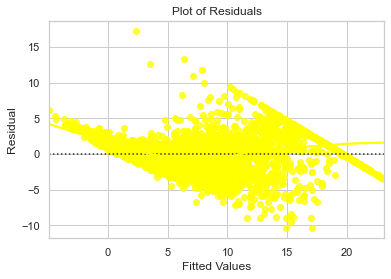

In [137]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="yellow",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Plot of Residuals")
plt.show()

#### Residual Plot does not seem to follow any pattern, assumption of Linearity is true

### Assumption 4: Normality of error terms

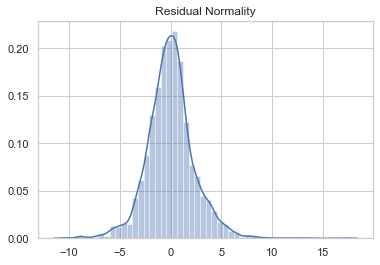

In [138]:
sns.distplot(residual) #plot the residuals
plt.title('Residual Normality')
plt.show()

#### Residuals have a normal distribution

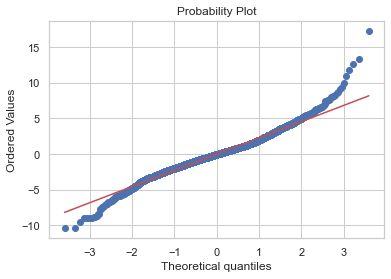

In [139]:
# QQ plot of residuals
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

#### The normal probability plot of residuals is approximately following a straight line

##### Assumption 5: No Heteroscedacity


##### Use the goldfeldquandt test to check for Heteroscedacity

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [140]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train20)
lzip(name, test)

[('F statistic', 1.0814851424239116), ('p-value', 0.036643562509651284)]

### Predicting test data


In [141]:
X_test_final = X_test[X_train20.columns] # select columns from test data that we used to build our final model

In [142]:
X_test_final.shape
X_test.shape


(1806, 31)

In [143]:
y_pred = olsres20.predict(X_test_final)  # get predicted values for y

### Check performance on Train and Test data using RMSE

In [144]:
#Checking root mean squared error on train and test data  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)


Train error: 2.3056097908563844
Test error: 2.359591391033115


### Test and Train errors are low and comparable to eachother, model is not overfitted

### CONCLUSION: Model 20 (olres20) is good for prediction and inference.

In [145]:
# Model 20
print(olsres20.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1562.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:19:46   Log-Likelihood:                -9497.3
No. Observations:                4213   AIC:                         1.902e+04
Df Residuals:                    4198   BIC:                         1.912e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1069.2367    

### OBSERVATIONS ABOUT  FINAL MODEL
    * Price of car is positively correlated with the Year. High value of year means car is newer and its price will be more
    *Price is negatively correlated with Mileage
    *Price of cars is higher in some cities like Bangalore, Coimbatore and Hyderabad.